## Machine Learning  Explainability

What are some insights and knowledge should we know when approaching a machine-learning problems in real life settings?

* Debugging: When getting data from different sources, is the right type. Can you debug existing code if something fails?
* Feature Engineering: If you dont have background knowledge of the topic and/or the data is masked for privacy reasons. What are some techniques of finding the right features and relationship of such features with 100 columns?
* Directing Data Collection: Collecting data can be expensive and a nuisance to initiate. How should you make an informed decision?
* Informed Human Decision Making: Sometimes insight is more important than the prediction itself. How do we leverage that?

### Permutation Importance

**Permutation Importance** is measured after a model is fitted. 

* If I randomly shuffle a single column of the validation data, leaving the target and all other columns in place, how would that affect the accuracy of predictions in that now-shuffled data?

**Process**

1) Get a trained model.

2) Shuffle the values in a single column, make predictions using the resulting dataset. Use these predictions and the true target values to calculate how much the loss function suffered from shuffling. That performance deterioration measures the importance of the variable you just shuffled.

3) Return the data to the original order (undoing the shuffle from step 2). Now repeat step 2 with the next column in the dataset, until you have calculated the importance of each column.

#### Setup

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from pdpbox import pdp, get_dataset, info_plots
from matplotlib import pyplot as plt

#Load Data/ Select target/fateure set
data = pd.read_csv('Documents\GitHub\wine-reviews\FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]

#train model
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)
X.head(5)

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Goals in PSO
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,0


#### Permutation method

In [11]:
import eli5
from eli5.sklearn import PermutationImportance


#Not sure how to choose selective values?; VERY Limited functionality
perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist(), top=20) 


Weight,Feature
0.0750 ± 0.1159,Goal Scored
0.0625 ± 0.0791,Corners
0.0437 ± 0.0500,Distance Covered (Kms)
0.0375 ± 0.0729,On-Target
0.0375 ± 0.0468,Free Kicks
0.0187 ± 0.0306,Blocked
0.0125 ± 0.0750,Pass Accuracy %
0.0125 ± 0.0500,Yellow Card
0.0063 ± 0.0468,Saves
0.0063 ± 0.0250,Offsides


The values towards the top are the most important features, and those towards the bottom matter least.

The first number in each row shows how much model performance decreased with a random shuffling (in this case, using "accuracy" as the performance metric).

#### Tree Plot

Displays the simplified decision tree of basic classifier

Leaves with children show their splitting criterion on the top
The pair of values at the bottom show the count of True values and False values for the target respectively, of data points in that node of the tree.

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('Documents\GitHub\wine-reviews\FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

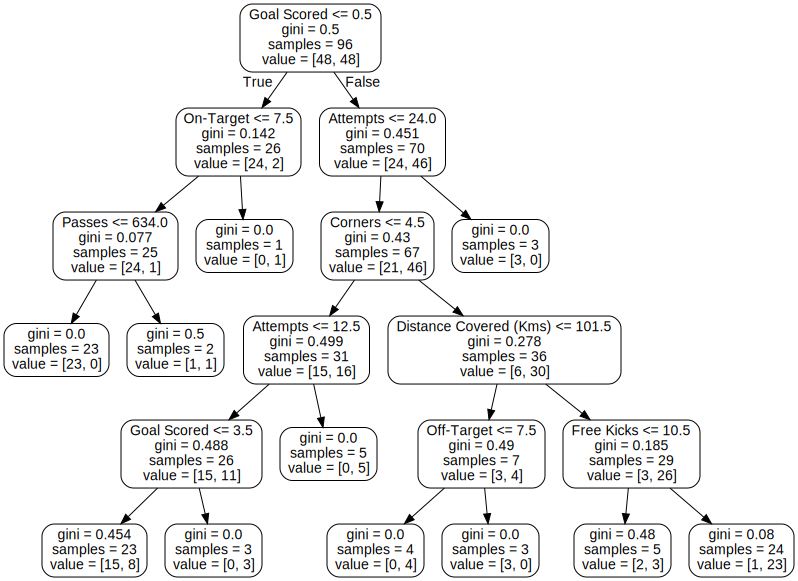

In [10]:
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names, rounded=True)
graphviz.Source(tree_graph)

In [46]:
|

SyntaxError: invalid syntax (<ipython-input-46-4b37ef281455>, line 1)

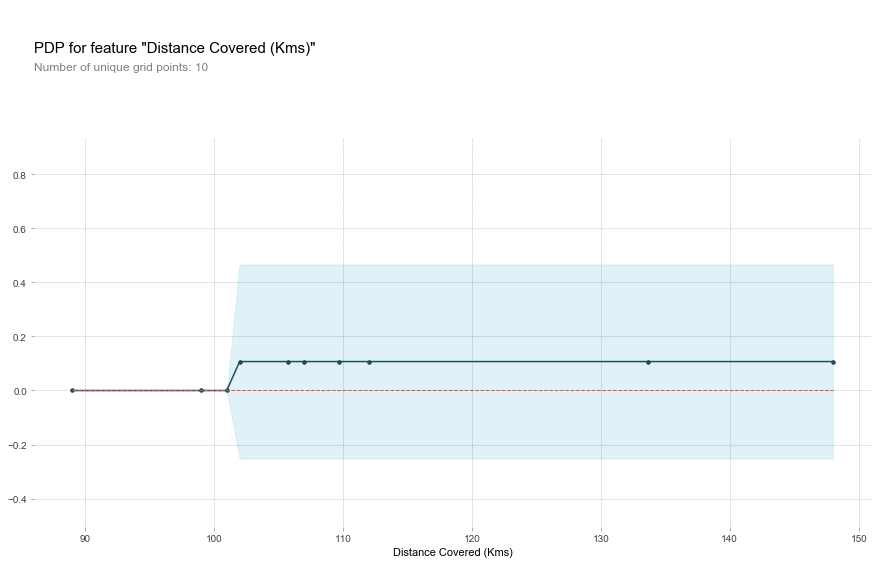

In [15]:
from pdpbox import pdp, get_dataset, info_plots

feature_to_plot = 'Distance Covered (Kms)'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

### 2D plots!

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

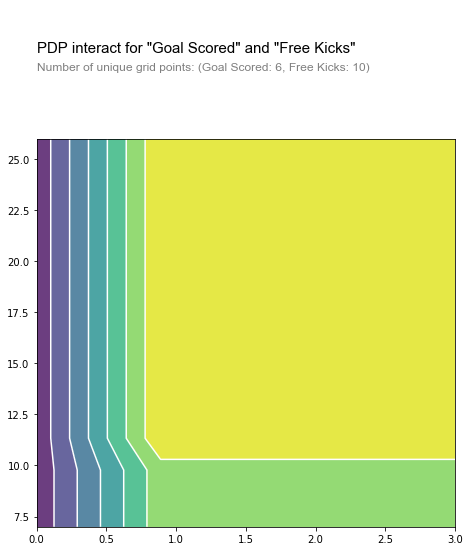

In [17]:
# Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot
features_to_plot = ['Goal Scored', 'Free Kicks']
inter1  =  pdp.pdp_interact(model=tree_model, dataset=val_X, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

In [25]:
from numpy.random import rand

rand(100)

array([0.46484557, 0.25012107, 0.86535545, 0.06969314, 0.87152029,
       0.98752473, 0.38155404, 0.33123529, 0.28929144, 0.02712516,
       0.99552502, 0.01001386, 0.20767563, 0.77541435, 0.11590703,
       0.83245484, 0.90066106, 0.40047089, 0.29942707, 0.305478  ,
       0.31790668, 0.82990529, 0.54299206, 0.77492067, 0.44105633,
       0.45935167, 0.3447441 , 0.37496875, 0.87606306, 0.56928584,
       0.05420694, 0.66399295, 0.5285018 , 0.39935222, 0.52020852,
       0.51745958, 0.4450805 , 0.61012747, 0.63995328, 0.03660745,
       0.21205247, 0.91013408, 0.65066713, 0.83516755, 0.2059421 ,
       0.98718837, 0.06499559, 0.61504897, 0.39394194, 0.80073491,
       0.77004432, 0.40894383, 0.14851361, 0.12801938, 0.78820517,
       0.91951088, 0.41067157, 0.22337122, 0.81794338, 0.59100984,
       0.3238783 , 0.87268903, 0.90878676, 0.6477356 , 0.4199454 ,
       0.96365737, 0.59683131, 0.27902591, 0.67075932, 0.00988715,
       0.82757924, 0.02663205, 0.11850884, 0.62772864, 0.10567

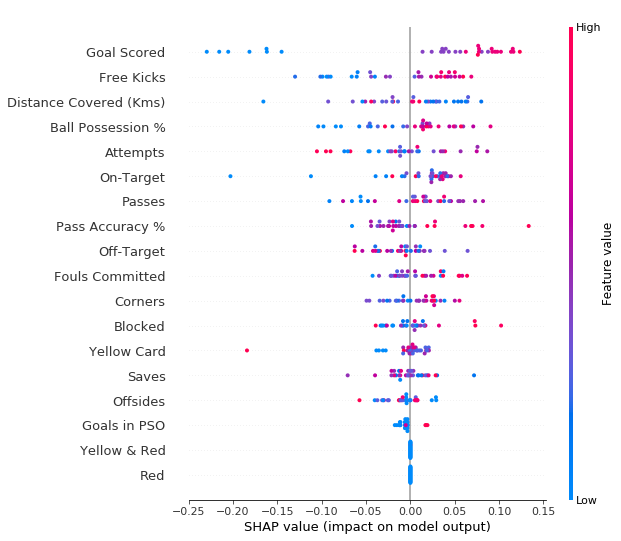

In [34]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_X)

#shap.summary_plot(shap_values, val_X)

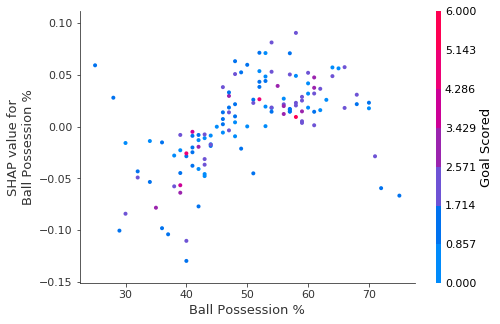

In [27]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot('Ball Possession %', shap_values[1], X, interaction_index="Goal Scored")